In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
import plotly.express as px

In [5]:
import plotly.graph_objects as go

In [6]:
import folium
from folium import plugins

In [7]:
plt.rcParams['figure.figsize']=10,12
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_excel('content/Covid cases in India.xlsx')
df_india=df.copy()

In [9]:
india_coord=pd.read_excel('content/Indian Coordinates.xlsx')
dbd_india=pd.read_excel('content/per_day_cases.xlsx',parse_dates=True,sheet_name='India')
dbd_italy=pd.read_excel('content/per_day_cases.xlsx',parse_dates=True,sheet_name='Italy')
dbd_korea=pd.read_excel('content/per_day_cases.xlsx',parse_dates=True,sheet_name='Korea')
dbd_wuhan=pd.read_excel('content/per_day_cases.xlsx',parse_dates=True,sheet_name='Wuhan')

In [10]:
df['Total cases']=df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']
total_cases=df['Total cases'].sum()
print(total_cases)

562


In [11]:
df.style.background_gradient(cmap='Blues')

,sno,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,1,Andhra Pradesh,9,0,0,0,9
1,2,Bihar,3,0,0,1,3
2,3,Chhattisgarh,1,0,0,0,1
3,4,Delhi,30,1,6,1,31
4,5,Gujarat,32,1,0,1,33
5,6,Haryana,14,14,11,0,28
6,7,Himachal Pradesh,3,0,0,1,3
7,8,Karnataka,41,0,3,1,41
8,9,Kerala,101,8,4,0,109
9,10,Madhya Pradesh,9,0,0,0,9


In [12]:
df['Total active']=df['Total cases']-(df['Death']+df['Cured'])
total_active=df['Total active'].sum()
print("Total active cases in india:",total_active)
Tot_cases=df.groupby('Name of State / UT')['Total active'].sum().sort_values(ascending=False).to_frame()
Tot_cases.style.background_gradient(cmap='Reds')

Total active cases in india: 512


,Total active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


In [13]:
df_full=pd.merge(india_coord,df,on='Name of State / UT')
map=folium.Map(Location=[20.5937, 78.9629],zoom_start=4,tiles='Stamenterrain')
for lat,lon,value,name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,lon],radius=value*0.8,popup=('<strong>State</strong>:'+str(name.capitalize() + '<br></br>')),color='#0000be',fill=True).add_to(map)
map

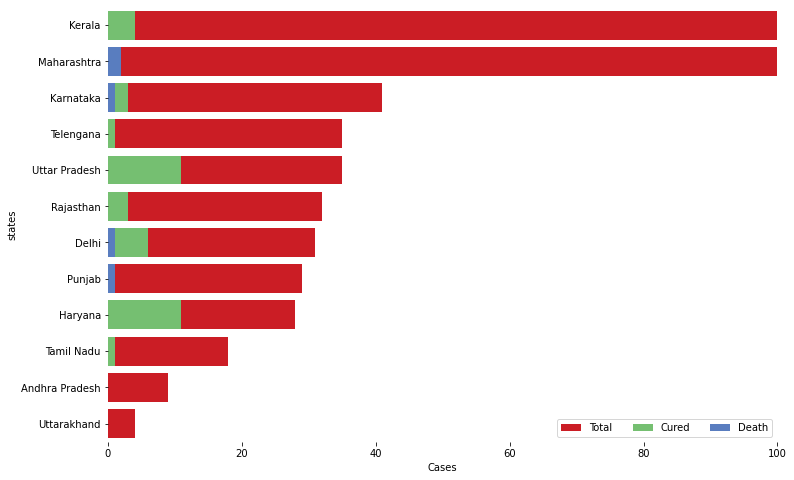

In [14]:
f,ax=plt.subplots(figsize=(12,8))
data=df_full[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("bright") #muted,pastel,deep,colorblind,dark
sns.barplot(x="Total cases",y="Name of State / UT",data=data,label="Total",color="r")
sns.set_color_codes("muted")
sns.barplot(x="Cured",y="Name of State / UT",data=data,label="Cured",color="g")
sns.barplot(x="Death",y="Name of State / UT",data=data,label="Death",color="b")
ax.legend(ncol=3,loc="lower right",frameon=True)
ax.set(xlim=(0,100),ylabel="states",xlabel="Cases")
sns.despine(left=True,bottom=True)

In [15]:
import plotly
plotly.io.renderers.default='colab'
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

In [16]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=dbd_india['Date'],y=dbd_india['Total Cases'],mode='lines+markers',name='Total cases'))
fig.update_layout(title_text='trends of rise in India',plot_bgcolor='rgb(230,230,230)')
fig.show()
import plotly.express as px
fig=px.bar(dbd_india,x='Date',y='New Cases',barmode='group',height=400)
fig.update_layout(title_text='coronavirus virus on daily basis',plot_bgcolor='rgb(230,230,230)')
fig.show()

In [17]:
fig=px.bar(dbd_india,x='Date',y='Total Cases',color='Total Cases',height=600)
fig.update_layout(title="cases in india",plot_bgcolor='rgb(230,230,230)')
fig.show()
fig=px.bar(dbd_italy,x='Date',y='Total Cases',color='Total Cases',height=600)
fig.update_layout(title="cases in italy",plot_bgcolor='rgb(230,230,230)')
fig.show()
fig=px.bar(dbd_korea,x='Date',y='Total Cases',color='Total Cases',height=600)
fig.update_layout(title="cases in Korea",plot_bgcolor='rgb(230,230,230)')
fig.show()
fig=px.bar(dbd_wuhan,x='Date',y='Total Cases',color='Total Cases',height=600)
fig.update_layout(title="cases in wuhan",plot_bgcolor='rgb(230,230,230)')
fig.show()

In [18]:
from plotly.subplots import make_subplots
fig=make_subplots(rows=3,cols=2,specs=[[{},{}],[{"colspan":2},None],[{"colspan":2},None]],subplot_titles=("s.korea","Italy","India","Wuhan"))
fig.add_trace(go.Bar(x=dbd_korea['Date'],y=dbd_korea['Total Cases'],marker=dict(color=dbd_korea['Total Cases'],coloraxis="coloraxis")),1,1)
fig.add_trace(go.Bar(x=dbd_italy['Date'],y=dbd_italy['Total Cases'],marker=dict(color=dbd_italy['Total Cases'],coloraxis="coloraxis")),1,2)
fig.add_trace(go.Bar(x=dbd_india['Date'],y=dbd_india['Total Cases'],marker=dict(color=dbd_india['Total Cases'],coloraxis="coloraxis")),2,1)
fig.add_trace(go.Bar(x=dbd_wuhan['Date'],y=dbd_wuhan['Total Cases'],marker=dict(color=dbd_wuhan['Total Cases'],coloraxis="coloraxis")),3,1)
fig.update_layout(title="TOTAL CASES",showlegend=False)
fig.show()

In [19]:
title='Main source for News'
labels=['s.korea','italy','india']
colors=['#015bb6','#65f227','#952150']
model_size=[10,10,12]
line_size=[1,1,3]
fig=go.Figure()
fig.add_trace(go.Scatter(x=dbd_korea['Days after surpassing 100 cases'],y=dbd_korea['Total Cases'],mode="lines+markers",name=labels[0],line=dict(color=colors[0],width=line_size[0]),connectgaps=True))
fig.add_trace(go.Scatter(x=dbd_italy['Days after surpassing 100 cases'],y=dbd_italy['Total Cases'],mode="lines",name=labels[1],line=dict(color=colors[1],width=line_size[1]),connectgaps=True))
fig.add_trace(go.Scatter(x=dbd_india['Days after surpassing 100 cases'],y=dbd_india['Total Cases'],mode="lines",name=labels[2],line=dict(color=colors[2],width=line_size[2]),connectgaps=True))
'''annotations=[]
annotations.append(dict(xref='paper',yref='paper',x=0.5,y=0.1,xanchor='center',yanchor='top',text='Days after suprassing 100 cases',font=dict(family='calibri',size=12,color='rgb(150,150,150)'),showarrow=False))
fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases',title_text="Comparison")'''
fig.show()

In [20]:
#exploring world wide
df=pd.read_csv('content/covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)
df_confirmed=pd.read_csv('content/time_series_covid19_confirmed_global.csv')
df_recovered=pd.read_csv('content/time_series_covid19_recovered_global.csv')
df_death=pd.read_csv('content/time_series_covid19_deaths_global.csv')
df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'},inplace=True)
df_death.rename(columns={'Country/Region':'Country'},inplace=True)


In [21]:
df.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [22]:
df2=df.groupby(["Date","Country","Province/State"])[['Date','Province/State','Confirmed','Deaths','Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,Australia,Australian Capital Territory,0.0,0.0,0.0
1,2020-01-22,Australia,From Diamond Princess,0.0,0.0,0.0
2,2020-01-22,Australia,New South Wales,0.0,0.0,0.0
3,2020-01-22,Australia,Northern Territory,0.0,0.0,0.0
4,2020-01-22,Australia,Queensland,0.0,0.0,0.0


In [23]:
df.query('Country=="India"').groupby("Date")[['Confirmed','Deaths','Recovered']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0
...,...,...,...,...
57,2020-03-19,194.0,4.0,15.0
58,2020-03-20,244.0,5.0,20.0
59,2020-03-21,330.0,4.0,23.0
60,2020-03-22,396.0,7.0,27.0


In [24]:
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,7777.4793,1639.7021,554.0,17.0,28.0
2020-01-23,7777.4793,1639.7021,652.0,18.0,30.0
2020-01-24,7777.4793,1639.7021,939.0,26.0,36.0
2020-01-25,7777.4793,1639.7021,1432.0,42.0,39.0
2020-01-26,7777.4793,1639.7021,2113.0,56.0,52.0


In [25]:
confirmed=df.groupby('Date')['Confirmed'].sum().reset_index()
recovered=df.groupby('Date')['Recovered'].sum().reset_index()
death=df.groupby('Date')['Deaths'].sum().reset_index()

In [26]:
labels=['s.korea','italy','india']
colors=['#015bb6','#65f227','#952150']
model_size=[10,10,12]
line_size=[1,1,3]
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode="lines+markers",name='Confirmed',line=dict(color=colors[0],width=line_size[0]),connectgaps=True))
fig.add_trace(go.Scatter(x=recovered['Date'],y=recovered['Recovered'],mode="lines+markers",name='Recovered',line=dict(color=colors[1],width=line_size[1]),connectgaps=True))
fig.add_trace(go.Scatter(x=death['Date'],y=death['Deaths'],mode="lines+markers",name='Deaths',line=dict(color=colors[2],width=line_size[2]),connectgaps=True))
fig.update_layout(title_text="Worldwide cases",yaxis_title="no of cases")
fig.show()

In [27]:
from fbprophet import Prophet

In [28]:
confirmed.columns=['ds','y']
confirmed['ds']=pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0
61,2020-03-23,336004.0


In [29]:
m=Prophet(interval_width=0.95)
m.fit(confirmed)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [30]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,355136.872940,334675.646880,374298.038605
65,2020-03-27,372235.326899,351846.775700,392848.549985
66,2020-03-28,388674.964099,368237.028265,409263.921735
67,2020-03-29,405307.954627,384772.007490,426764.942288
68,2020-03-30,418529.648415,395241.243776,442634.562412


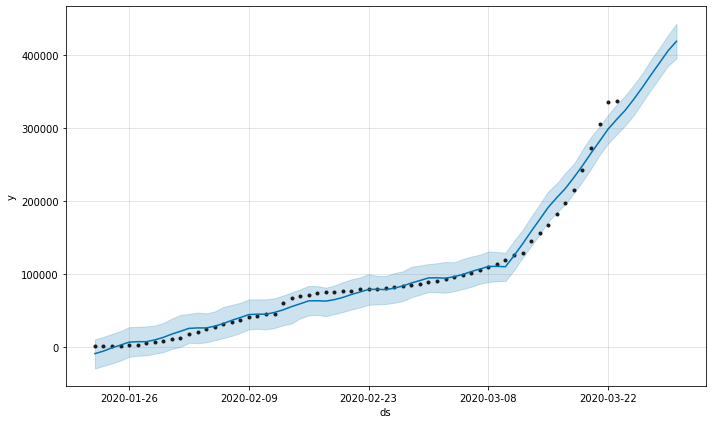

In [31]:
confirmed_forecast_plot=m.plot(forecast)

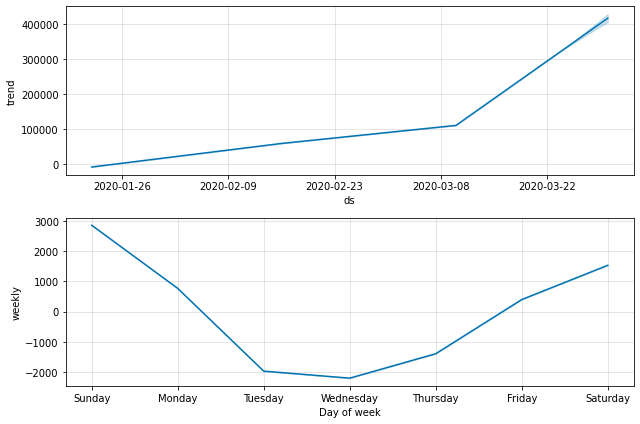

In [32]:
confirmed_forecast_plot=m.plot_components(forecast)